# 손글씨 문자 이미지의 확인
- 10개 정도

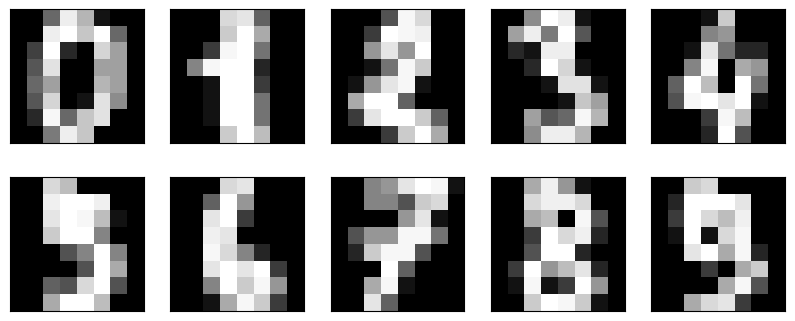

데이터의 형태:  (1797, 64)
라벨:  [0 1 2 3 4 5 6 7 8 9]


In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10 # 표시하는 이미지의 수
plt.figure(figsize=(10, 4))

for i in range(n_img):
  ax = plt.subplot(2, 5, i+1)
  ax.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r") # reshape()
  ax.get_xaxis().set_visible(False) # 축을 표시하지 않음
  ax.get_yaxis().set_visible(False)

plt.show()

print("데이터의 형태: ", digits_data.data.shape)
print("라벨: ", digits_data.target[:n_img])

# 데이터를 훈련용과 테스트용으로 분할
scikit-learn의 train_test_split을 사용하여 데이터를 훈련용과 테스트용으로 분할.

In [5]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target

x_train, x_test, t_train, t_test = train_test_split(digit_images, labels) # 25%가 테스트용

# Tensor로 변환
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

# 모델 구축
- nn 모듈의 Sequential()클래스로 신경망의 모델을 구축함.
- 초기값으로서 nn 모듈에 정의되어 있는 층을, 입력에 가까운 층부터 순서대로 나열함.



In [7]:
# nn.Linear()함수: 뉴런이 인접하는 층의 모든 뉴런과 연결되는 전결합층
# nn.ReLU()함수
# nn.Sequential()클래스: 여러층을 순차적으로 쌓은 신경망 모델을 구축


from torch import nn

net = nn.Sequential(nn.Linear(64, 32), # 전결합층
                    nn.ReLU(),         # ReLU
                    nn.Linear(32, 16),
                    nn.ReLU(),
                    nn.Linear(16, 10))

print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


# 학습
- nn.CrossEntropyLoss()함수 (소프트맥스 함수 + 교차 엔트로피 오차), 최적화 알고리즘에 SGD를 설정
- 순전파는 훈련 데이터, 테스트 데이터 양쪽에서 실시하여 오차를 계산
- 역전파를 실시하는 것은 훈련 데이터 뿐.

### 모델의 훈련

In [10]:
# 모델의 훈련

from torch import optim

# 소프트맥스 함수 + 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# SGD 모델의 파라미터를 설정
optimizer = optim.SGD(net.parameters(), lr=0.01) # 학습률은 0.01

# 손실 로그
record_loss_train = []
record_loss_test = []

# 훈련 데이터를 1000회 사용한다.
for i in range(1000):

  # 파라미터의 경사를 0으로
  optimizer.zero_grad()

  # 순전파
  y_train = net(x_train)
  y_test = net(x_test)

  # 오차를 구해서 기록한다.
  loss_train = loss_fnc(y_train, t_train)
  loss_test = loss_fnc(y_test, t_test)

  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())


  # 역전파(경사를 계산)
  loss_train.backward()

  #파라미터 갱신
  optimizer.step()

  if i%100 == 0:
    print("Epoch:", i, "Loss_train:", loss_train.item(), "Loss_Test:", loss_test.item())


Epoch: 0 Loss_train: 2.393162250518799 Loss_Test: 2.375516414642334
Epoch: 100 Loss_train: 0.908839762210846 Loss_Test: 0.9549384713172913
Epoch: 200 Loss_train: 0.3655487596988678 Loss_Test: 0.429054856300354
Epoch: 300 Loss_train: 0.2288873940706253 Loss_Test: 0.3047446310520172
Epoch: 400 Loss_train: 0.1697658896446228 Loss_Test: 0.2545192837715149
Epoch: 500 Loss_train: 0.13576333224773407 Loss_Test: 0.2277584671974182
Epoch: 600 Loss_train: 0.11301914602518082 Loss_Test: 0.21207363903522491
Epoch: 700 Loss_train: 0.0966314747929573 Loss_Test: 0.20127439498901367
Epoch: 800 Loss_train: 0.08418218046426773 Loss_Test: 0.19361917674541473
Epoch: 900 Loss_train: 0.07426736503839493 Loss_Test: 0.1878703087568283


# 오차 추이
- matplotlib을 사용하여 오차 추이를 확인함.
- 훈련 데이터, 테스트 데이터 기록을 그래프로 표시

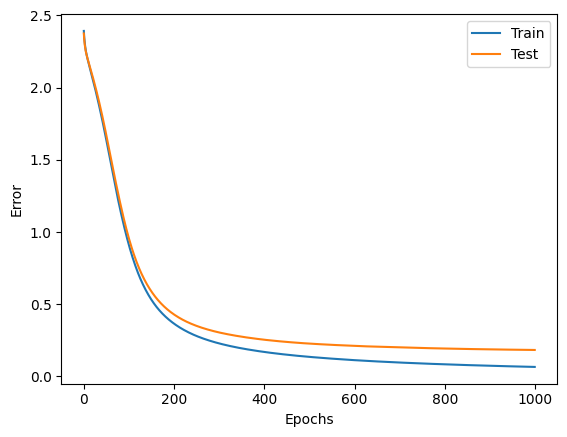

In [12]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# 정답률
- 모델의 성능을 파악하기 위해 테스트 데이터 사용 정답률을 측정함.

In [13]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("정답률:", str(count/len(y_test)*100) + "%")

정답률: 94.22222222222221%


# 훈련한 모델을 사용한 예측
손글씨 문자 이미지를 입력하고, 모델이 동작하는 것을 확인한다.

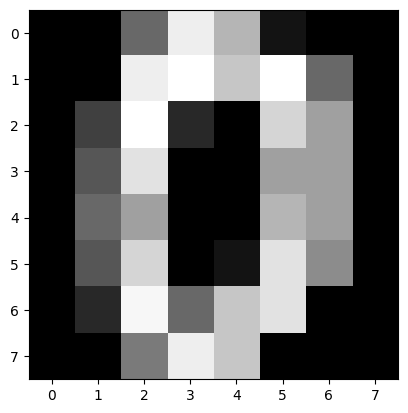

정답: 0 예측 결과: 0


In [14]:
# 입력 이미지
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)

plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("정답:", labels[img_id], "예측 결과:", y_pred.argmax().item())

# 연습
Pytorch를 사용하여 모델을 구축하고 최적화 알고리즘을 설정한다.

### 데이터를 훈련용과 테스트용으로 분할

In [15]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits_data = datasets.load_digits()

digit_images = digits_data.data
labels = digits_data.target

x_train, x_test, t_train, t_test = train_test_split(digit_images, labels) # 25%가 테스트용

# Tensor로 변환
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

# 모델 구축
- nn 모듈의 Sequential() 클래스를 사용하며 print(net)로  다음과 같이 표시 되는 모델 구축하기
- 코드는 비워져 있었고, 출력 값을 보고 코드 작성한 것.

In [17]:
from torch import nn

net = nn.Sequential(nn.Linear(64, 128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10))

print(net)

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


# 학습
- 모델을 훈련한다.
- 최적화 알고리즘의 설정을 한다.
- 최적화 알고리즘 선택하기: TORCH.OPTIM 검색
URL
https://pytorch.org/docs/stable/optim.html

In [18]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

####### 최적화 알고리즘
optimizer = optim.Adam(net.parameters())

# 손실 로그
record_loss_train = []
record_loss_test= []

# 1000 에포크 학습
for i in range(1000):

  # 경사를 0으로
  optimizer.zero_grad()

  # 순전파
  y_train = net(x_train)
  y_test = net(x_test)

  # 오차를 구한다
  loss_train = loss_fnc(y_train, t_train)
  loss_test = loss_fnc(y_test, t_test)

  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  # 역전파(경사를 구한다)
  loss_train.backward()

  # 파라미터 갱신
  optimizer.step()

  if i%100 == 0:
    print("Epoch:", i, "Loss_train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_train: 2.543104410171509 Loss_Test: 2.5351507663726807
Epoch: 100 Loss_train: 0.019620198756456375 Loss_Test: 0.09735514968633652
Epoch: 200 Loss_train: 0.003394709900021553 Loss_Test: 0.09844464808702469
Epoch: 300 Loss_train: 0.0012955707497894764 Loss_Test: 0.10313680022954941
Epoch: 400 Loss_train: 0.0006786318263038993 Loss_Test: 0.10696671903133392
Epoch: 500 Loss_train: 0.00041649118065834045 Loss_Test: 0.10976268351078033
Epoch: 600 Loss_train: 0.0002815754560288042 Loss_Test: 0.11224677413702011
Epoch: 700 Loss_train: 0.00020261600730009377 Loss_Test: 0.11451131850481033
Epoch: 800 Loss_train: 0.00015262255328707397 Loss_Test: 0.11638569831848145
Epoch: 900 Loss_train: 0.00011901727702934295 Loss_Test: 0.11804776638746262


# 오차 추이 확인

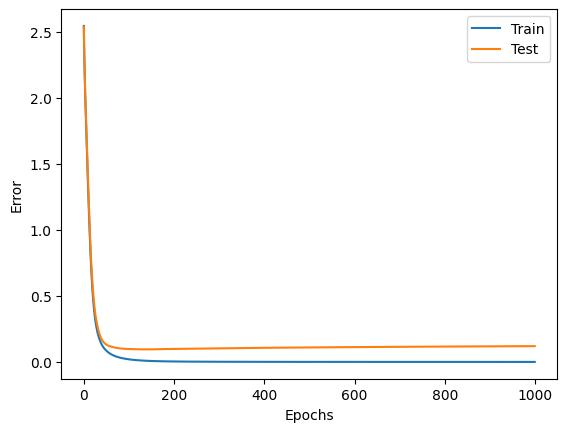

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# 정답률의 계산

In [20]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("정답률:", str(count/len(y_test) * 100) + "%")

정답률: 98.0%
